# Biological Signals Analysis - Week 2 Homework

## Created by Guy Singer, January 11, 2024

## Table of Contents
- [Math Exercises - Dirac's Delta and Discrete Fourier Transforms](#math-exercises)
- [Programming Exercises - Analyzing EEG Data](#programming-exercises)
    - [Loading and Visualizing the EEG Data](#loading-data)
    - [Homework Question: Record Your Observations](#observation-time-domain)
    - [Homework Question: Sampling in Time](#sampling-in-time)
    - [Homework Question: Fourier Transform of the EEG Data](#fft-implementation)
    - [Homework Question: record observations about the frequency plot](#describing-frequency)
    - [Decibel Scaling](#decibel-scale)
    - [Homework Question: interpreting decibel scale results](#decibel-scale)
    - [The Spectrogram](#spectrogram)

<a id="math-exercises"></a>
## Math Exercises - Dirac's Delta and Discreet Fourier Transforms

The first portion of this homework assignment contains mathematics questions related to the topics covered this week (sampling in time and transformations into the frequency domain).
Please write your answers using the Jupyter markup cell’s LaTeX interpreter, or embed a scanned image/pdf of your answers into the markup cell.

More information about LaTeX and Jupyter markdown formatting can be found here:
[https://jupyterbook.org/en/stable/content/math.html](https://jupyterbook.org/en/stable/content/math.html)
And Here:
[https://ashki23.github.io/markdown-latex.html](https://ashki23.github.io/markdown-latex.html)

------------------------------------------------------------------------------------------------------

<a id='programming-exercises'> </a>
## Programming Exercises - Analyzing EEG Data

The following code cells contain the programming portion of this homework assignment. In this assignment, we will load an EEG signal, examine it, and record our obersvations. Then, we will transform the signal into the frequency domain using a Fourier Transform. Finally, we will write down our observations about the signal expressed in the frequency domain.

<a id='loading-data'> </a>
### Loading and Visualizing EEG Data

In [3]:
# Import dependencies
from pylab import *
rcParams['figure.figsize']=(12,3)

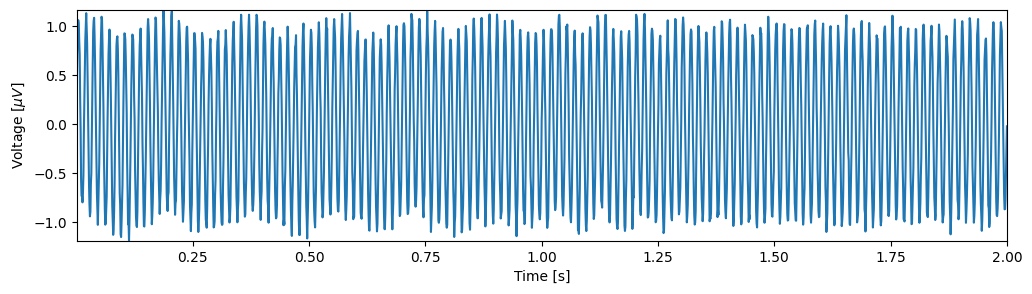

In [4]:
## First, we inspect the data in the time domain
from scipy.io import loadmat

data = loadmat('/Users/guysinger/Desktop/BSA-2023/week-2/EEG-Signal-Homework.mat')  # Load the EEG data
EEG = data['EEG'][:, 0]                 # Extract the EEG variable
t = data['t'][0]                        # Extract the time variable

plot(t, EEG)                            # Plot the data in the time domain
xlabel('Time [s]')                      # Label the time axis
ylabel('Voltage [$\mu V$]')             # Label the voltage axis
autoscale(tight=True)                   # Minimize white space
show()

In our plot, the voltage trace is plotted as a continuous line, but don't be fooled into thinking that the signal has been stored as a continuous signal. If we zoom in on the data, we can see our signal actually consists of discreet data points (shown below). Although the physiological signal being recorded evolves as a continuous signal, we observe discrete samples of this continuous signal. The sampling rate is determined by the EEG recording device used. In this example, the **data is being sampled at 1000Hz, or one sample every 1ms.**

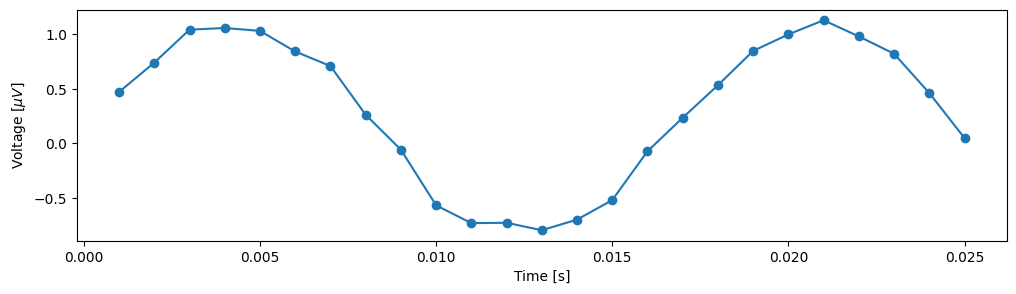

In [5]:
plot(t[:25], EEG[:25], 'o-')    # Plot the first 25 points
xlabel('Time [s]')              # Label the time axis
ylabel('Voltage [$\mu V$]')     # Label the voltage axis
show()

<a id="observation-time-domain"></a>
### Homework Question: record your observations

In the following markdown cell, in a few sentences, record your observations of this signal in its time domain. What can and cannot be inferred from the signal when it is represented in this format?

 ** Your Answer Here **

<a id="sampling-in-time"></a>
### Homework Question: calculating total time and sampling frequency

We denote the sampling variables as follows:

&emsp; **Total time sampled:** &emsp;  $ T = N \Delta$

Where:

&emsp; $\Delta$ &emsp; = &emsp; time between samples

&emsp; $N$ &emsp; = &emsp; number of samples

We denote the **sampling frequency** as:

&emsp; $f_s = 1/\Delta$

Please fill out the following python code sell to define the variables for $\Delta$ (dt), $N$, $T$, and $f_s$ (f_s).

In [6]:
dt = t[1]-t[0]# Your code here | Hint: "t" is an array where each index in the array is the timestamp of a sample
N = len(EEG)# Your code here | Hint: "EEG" is an array where each index in the array is a sample
T = N*dt# Your code here 
f_s = 1/dt## Your Code Here 

<a id="fft-implementation"></a>
### Homework Question: Fourier Transform of the EEG Data

While there are many techniques to analyze rhythmic activity in EEG data, in this example we will compute the *power spectral density*, or simply the *spectrum*, of the signal using the <a href="https://en.wikipedia.org/wiki/Fourier_transform" rel="external">*Fourier transform*</a>.
    
**Note**: The *spectrum* of the data is the magnitude squared of the Fourier-transformed data. The spectrum indicates the amplitude of rhythmic activity as a function of frequency. The *power spectral density* describes the extent to which sinusoids of a single frequency capture the structure of the data. To compute the power over any range of frequencies, we would integrate (or for discrete frequencies, sum) the spectrum over that frequency range.

In the following code cell, use the Fourier transform functions in Numpy to transform the EEG signal into the frequency domain.

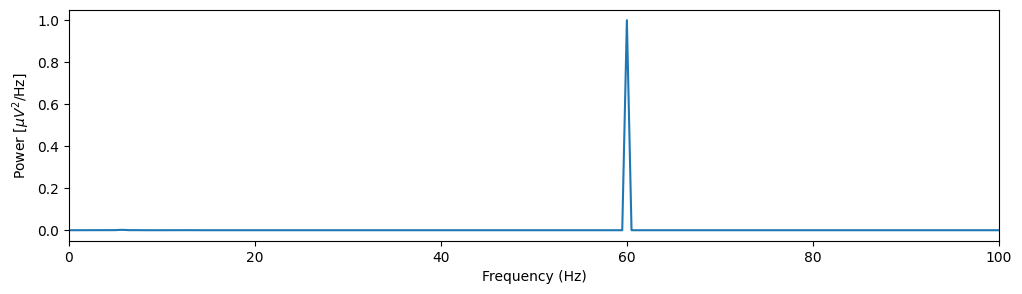

In [8]:
import numpy as np

EEG_transformed = np.fft.rfft(EEG) # Your code here 
''' Hint: look up the fourier transform functions in Numpy, and use the Discrete Fourier Transform for real input function'''

spectrum = (2 * dt ** 2 / T * EEG_transformed  * EEG_transformed.conj()).real
faxis = arange(len(spectrum)) / T.max()
plot(faxis, spectrum)
xlim([0, 100]) # Setting the frequency range.
xlabel('Frequency (Hz)')
ylabel('Power [$\mu V^2$/Hz]')
show()

<a id="describing-frequency"></a>
### Homework Question: record observations about the frequency plot

In the following markdown cell, record your observations about the frequency domain plot, and what conclusions can or cannot be drawn from this plot. Do you suspect there to be any data that is not immediately observable in the plot?

** your answer here **

<a id="decibel-scale"></a>
### Decibel Scaling

From the frequency plot, we can observe that the spectrum is dominated by a single peak at 60 Hz. There may be additional weaker rhythmic activity in the data, but these features remain hidden in the plot because of the large 60 Hz peak. We could state that the 60 Hz peak saturates the vertical scale. One technique to emphasize lower-amplitude rhythms hidden by large-amplitude oscillations is to change the scale of the spectrum to **decibels**. The decibel scale is a logarithmic scale. To convert our scale to decibels, we divide the spectrum by the maximum value observed in it, and then take the base 10 logarithm of this ratio. Finally, we multiply the result by 10.

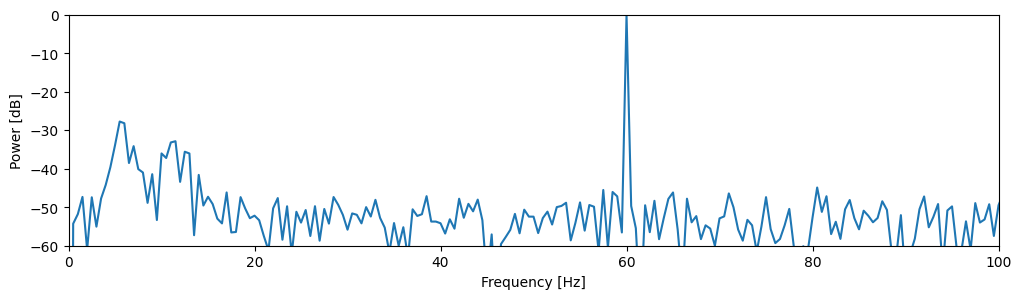

In [9]:
plot(faxis, 10 * log10(spectrum / max(spectrum)))  # Plot the spectrum in decibels.
xlim([0, 100])                           # Setting the frequency range.
ylim([-60, 0])                           # Setting the decibel range.
xlabel('Frequency [Hz]')                 # Label the axes.
ylabel('Power [dB]')
show()

<a id="decibel-scale"></a>
### Homework Question: interpreting decibel scale results

In the following code cell, answer the question "what is the value in decibels at 60Hz?"
Enter your answer by setting the variable "decibel-value_at_60" to your answer.

In [ ]:
decibel-value_at_60 = # your answer here

The decibel scale reveals new structure in the spectrum. In particular, two peaks have emerged at frequencies 5–15 Hz. These peaks are much weaker than the 60 Hz signal; both peaks are approximately 30 dB below the maximum at 60 Hz, or equivalently, three *orders of magnitude* weaker. Because these peaks are so small relative to the 60 Hz signal, neither was apparent in the original plot of the spectrum.

<a id="spectrogram"></a>
### The Spectrogram

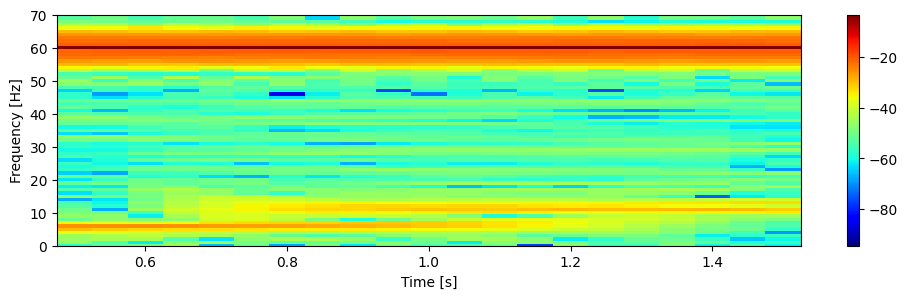

In [10]:
from scipy.signal import spectrogram

f, t, Sxx = spectrogram(
    EEG,                  
    fs=f_s,                
    nperseg=int(f_s),     
    noverlap=int(f_s * 0.95))     
pcolormesh(t, f, 10 * log10(Sxx), cmap='jet')
colorbar()                
ylim([0, 70])             
xlabel('Time [s]')        
ylabel('Frequency [Hz]')
show()